## Markov Chain Monte-Carlo (MCMC)

#### *15 November 2019*

#### *DATA 1010*

In [1]:
using Plots, Random, LinearAlgebra, Statistics, Distributions, LaTeXStrings
gr(fontfamily="Palatino",legend=false);

## Problem 1

Last time we discussed the following Markov chain:

![](markov-chain.JPG)

We discovered that its *stationary distribution* (the probability distribution of the walker's location after a large number of steps) is $[4/9, 2/9, 2/9, 1/9]$. In this problem, we'll see why this distribution is an eigenvector of $P'$ (the transpose of $P$).

(a) Suppose that $\nu$ is a row vector describing the probability distribution of the walker's state at a given time $n$. Show that $\nu P$ describes the state of the the walker at time $n+1$. 

![](1.JPG)

(b) The stationary distribution is characterized by not changing from one step to the next:

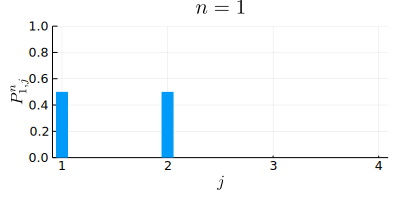

In [2]:
P = [1/2 1/2  0    0
     1/2  0  1/2   0
      0   0  1/2  1/2
      1   0   0    0]
n = 1
sticks((P^n)[1,:], label = "probability mass", linewidth = 12, title = "\$n = $n\$", 
        size = (400, 200), ylims = (0, 1), xlabel = L"j", ylabel = L"P^n_{1,j}")

Use this observation together with part (a) to write down an equation that the stationary distribution should satisfy.

*Solution*. The stationary distribution $\nu$ should satisfy $\nu = \nu P$. (Left eigenvector of P or the eigenvector of P')

In [3]:
eigen(copy(P'))

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
eigenvalues:
4-element Array{Complex{Float64},1}:
 -0.5000000000000001 + 0.0im                
                0.25 - 0.43301270189221874im
                0.25 + 0.43301270189221874im
  1.0000000000000002 + 0.0im                
eigenvectors:
4×4 Array{Complex{Float64},2}:
 -0.632456+0.0im   -0.5+1.94289e-16im   -0.5-1.94289e-16im  0.8+0.0im
  0.632456+0.0im  -0.25-0.433013im     -0.25+0.433013im     0.4+0.0im
 -0.316228+0.0im    0.5-0.0im            0.5+0.0im          0.4+0.0im
  0.316228+0.0im   0.25+0.433013im      0.25-0.433013im     0.2+0.0im

Final note: a beautiful theorem in linear algebra called the **Perron Frobenius** theorem says that if $P$ is a square matrix of positive entries whose rows sum to 1 and **for which some power of the matrix has all positive entries**, then $P'$ has a unique eigenvector with eigenvalue 1, and that eigenvector can be chosen to have positive entries. Furthermore, the limit of $P^n$ as $n\to\infty$ is the matrix with this eigenvector in every row.

Express the "*some power of the matrix has all positive entries*" condition in Markov chain terms.


*Solution*. 

![](2.JPG)

---

Suppose we wanted to sample from the distribution $[4/9, 2/9, 2/9, 1/9]$. Problem 1 tells us that we could do that approximately by starting wherever and running this Markov chain for a few dozen steps. Isn't that a silly thing to do, given that we could just use the inverse CDF trick (generate a $\operatorname{Unif}([0,1])$ and see whether it's in $[0,4/9), [4/9,6/9), [6/9,8/9),$ or $[8/9,1)$). Furthermore, how could we have cooked up those transition probabilities, starting from the desired stationary distribution?

It turns out that these questions have good answers: we *can* find suitable transition probabilities in a very general way, and there are many cases where that works and simpler techniques don't.

![](3.JPG)

## Problem 2 (Metropolis-Hastings: given the stationary distr you want, given the proposal matrix, running MH will simulate the transition matrix. Simulating the transition matrix similates raising the transition matrix to the power of n: $P^n$, therefore you sample from the distribution you desire (starting point does not matter))

One popular technique for **finding transition probabilities which give rise to a pre-specified stationary distribution $\nu$** is called **Metropolis-Hastings**. Suppose $\Omega$ is the set we're looking to sample from (size of 4: A, B, C, D), and $f$ is either the PMF or PDF of $\nu$. Metropolis-Hastings defines the following Markov chain:

* For each $x\in \Omega$, let $q(x)$ be a distribution on $\Omega$ that we can readily sample from, and for which $q(x)(y) = q(y)(x)$ for all $x$ and $y$ in $\Omega$.
* Choose the initial state $X_0$ arbitrarily, and sample $X_{\text{prop}}$ from the distribution $q(X_0)$ (proposed X)
* Define $X_1$ to be $X_{\text{prop}}$ with probability $\frac{f(X_{\text{prop}})}{f(X_0)}$ (or 1, if this ratio exceeds 1) and $X_0$ otherwise.
* Repeat steps (ii) and (iii) to obtain $X_2$ from $X_1$, $X_3$ from $X_2$, and so on.

Note: we call $\frac{f(X_{\text{prop}})}{f(X_0)}$ the **acceptance ratio** $\alpha(X_0, X_{\text{prop}})$, since it determines the probability with which we accept the proposal.

Consider the four-element $\Omega$ studied in problem 1, with desired stationary distribution $\nu$ given by the same vector $[4/9, 2/9, 2/9, 1/9]$. Suppose that the proposal distributions $q$ are defined by $q(x)(y) = 1/2$ if $x$ and $y$ are cyclic neighbors (that is, D and B are the neighbors of A, etc.). Find the transition probabilities specified by the Metropolis-Hastings algorithm. Confirm numerically that the desired stationary distribution is achieved.

*Solution*. (Note: we first need the probability of a state to be proposed (Proposal matrix Q), we then need the probability of the proposed state to be accepted (Acceptance ratio))

![](4.JPG)

In [4]:
P = [5/8 1/4  0   1/8
     1/2  0  1/2   0
      0  1/2 1/4  1/4
     1/2  0  1/2   0]

P^100

4×4 Array{Float64,2}:
 0.444444  0.222222  0.222222  0.111111
 0.444444  0.222222  0.222222  0.111111
 0.444444  0.222222  0.222222  0.111111
 0.444444  0.222222  0.222222  0.111111

## Problem 3

Now let's consider an example where MCMC adds value relative to other sampling methods. 

Suppose that $\Omega$ is the set of tweets consisting entirely of letters and spaces (that is, length-280 strings). Consider the probability measure on $\Omega$ for which the probability of a particular tweet $(c_1, c_2, \ldots, c_{280})$ is proportional to 
$$
f(c_1,c_2)f(c_2,c_3)\ldots f(c_{279},c_{280}), 
$$
where $f(a,b)$ is the proportion of two-letter sequences in the English language which are equal to `'ab'`.   
(Note: this product is the desired stationary probability for that state, as question a and b say, we can estimate it)

(a) How should we deal with tweets that are less than 280 characters?

(b) How could you estimate $f$ in practice?

(c) How could we generate a random tweet drawn from this probability measure? 

Note: this idea has actually been used to decipher texts; see [this paper](https://math.uchicago.edu/~shmuel/Network-course-readings/MCMCRev.pdf). 

![](5.JPG)

![](6.JPG)

![](7.JPG)

![](8.JPG)

*Solution.*  
(a). Pad them out with spaces.  
(b). Download a bunch of tweets, clean the data, and loop through all the character pairs to come up with a big tally for all $27^2$ pairs  
(c). Start somewhere in the tweet space, then use a proposal distribution together with the Metropolis-Hastings acceptance ratio to move around in the space in such a way that after many steps, the distribution of our location in $\Omega$ is indeed proportional to the plausibility score function (the product, the desired stationary distribution).

## Problem 4 (MCMC to sample a posterior distribution)

Finally, let's see how to use MCMC to do Bayesian linear regression. 

Consider a linear regression model $y = mx + b + ϵ$, where $\epsilon$ is normally distributed with mean 0 and variance $1$. We'll treat the parameters $m$ amd $b$ as Bayesian parameters, meaning that they're random variables with some distribution. As priors, let's take normal distributions with mean 0 and variance 100 for both $m$ and $b$.

Our goal is to sample from the posterior distribution given some observations $(x_i, y_i)$ as $i$ ranges from 1 to $n$. Let's use kind of an extreme example to make the point:

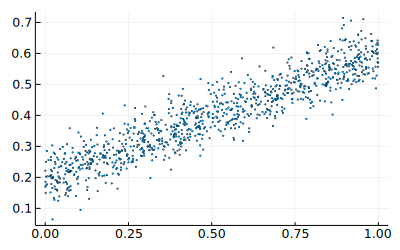

In [5]:
x = rand(Uniform(0, 1), 1000)
y_mean = 0.4x .+ 0.2
y = y_mean + rand(Normal(0, 0.05), 1000)
function observations()
    scatter(x, y, ms = 1, msw = 0.2, size = (400, 250)) # ms 和 msw调整点的大小，不管他
end
observations()

To sample from the posterior, we'll use Metropolis-Hastings on the parameters $m$ and $b$. That means we'll start at initial values $(m_0, b_0)$ for those variables, then propose an update drawn from $q(m_0, b_0)$. We'll calculate the acceptance ratio for the posterior distribution, move or stay based on that ratio, and so on. 

(a) What is the acceptance ratio for the posterior distribution, given the observations?

![](9.JPG)

In [7]:
N = Normal(0,10)
δ(x, y, m, b) = sum((yᵢ - m*xᵢ - b)^2/2 for (xᵢ, yᵢ) in zip(x,y))
function α(x, y, m, b, m_prop, b_prop)
    exp(-δ(x, y, m_prop, b_prop) + δ(x, y, m, b)) * 
        pdf(N, m_prop)/pdf(N, m) * pdf(N, b_prop)/pdf(N, b)
end

α (generic function with 1 method)

In [9]:
function mcmc(n_iterations)
    m, b = 0.0, 0.0
    θs = [(m, b)]
    for i in 1:n_iterations
        m_prop, b_prop = m + rand(Normal(0, 0.005)), b + rand(Normal(0, 0.005))
        if rand() < α(x, y, m, b, m_prop, b_prop)
            m, b = m_prop, b_prop
            push!(θs, (m,b))
        end
    end
    θs
end

mcmc (generic function with 1 method)

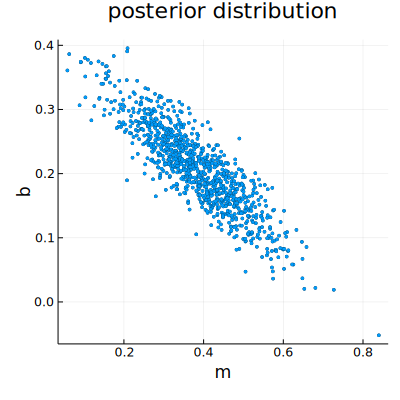

In [15]:
scatter([mcmc(3000)[end] for _ in 1:1000], size = (400,400), ms=2, msw=0.2,
         title = "posterior distribution", xlabel="m", ylabel="b")

Note that it takes quite a while for the influence of the starting state to wear off; this is called the **burn-in** phase. After that, the line fluctates around the region where there is a significant amount of posterior probability mass (in (m,b) space). This is reflecting the fact that the posterior distribution is a *distribution*, not just a single value as in frequentist statistics.

## Summary

![](10.JPG)

![](11.JPG)